# Basics
Analyze a covert social network to determine who the weakest link is, and what happens to the network when you remove that link. Provide notes and a write-up, which should include at least some level of visualization.
Pass the Connected Data Basics quiz with a score of 85% or better.
This doesn't require the use of a specific network, but you can find a collection of covert social networks here (Links to an external site.). Pick one or more to work with.

Do what you need to do to import them and make sense of them. Some contain dynamic data over time--while you are welcome to take one of these on, it may be easier to just focus on the network during it's most connected period (usually at or near the end of the time series). How would you figure out the most effective node to remove. You can do this theoretically, or experimentally (remove the node and re-run the network metrics) or some combination of both.

Write up your observations, including any visualizations of the data. This may be part of your notebook or separate from it. Upload all to your repository and be ready to share the link/files. You'll enter these when you take the test.

The test consists of 20 questions, some of which you may have already encountered in your self-tests each section.

I decided to use the "London Gang" csv available from: http://www.casos.cs.cmu.edu/tools/datasets/external/index.php#covert
It comes with a csv that contains the relationships of 54 individuals from inner-city streeet gang (2005-2009). It is originally a 1-Mode matrix of 54 x 54 persons by persons, unidrected, valued. The following is how the "Nodes" seem to appear:

1: Hang out Together
2: Co-offend together
3: Co-offend together (serious crime)
4: Co-offend together (serious crime + kin)

The second csv contains "Attributes" of the individuals such as Age, Birthplace, Residence, Arrests, Convictions, Prison, and Music:

1: West Africa
2: Caribbean
3: UK
4 East Africa

Citation: Grund, T. and Densley, J. (2015) Ethnic Homophily and Triad Closure: Mapping Internal Gang Structure Using Exponential Random Graph Models. Journal of Contemporary Criminal Justice, Vol. 31, Issue 3, pp. 354-370

I decided to mess with this a bit here to see if I couldn't produce a "Nodes" and "Edges" csv to import into Gephi, or just import the provided CSV alone.

In [2]:
import pandas as pd
london_gang = pd.read_csv (r'C:\Users\Vainc\Downloads\london\LONDON_GANG.csv')
print (london_gang)

    Unnamed: 0  1  2  3  4  5  6  7  8  9  ...  45  46  47  48  49  50  51  \
0            1  0  1  1  2  1  1  2  3  2  ...   1   1   0   0   0   0   1   
1            2  1  0  3  0  0  2  1  2  1  ...   0   0   0   0   0   0   0   
2            3  1  3  0  4  4  3  1  3  2  ...   0   0   0   0   0   0   0   
3            4  2  0  4  0  4  3  1  0  0  ...   0   0   0   0   1   0   0   
4            5  1  0  4  4  0  3  1  0  1  ...   0   0   1   0   1   0   0   
5            6  1  2  3  3  3  0  1  0  0  ...   0   0   0   0   1   0   0   
6            7  2  1  1  1  1  1  0  1  2  ...   0   1   1   1   0   0   0   
7            8  3  2  3  0  0  0  1  0  2  ...   0   0   0   0   0   0   0   
8            9  2  1  2  0  1  0  2  2  0  ...   0   1   0   0   0   0   0   
9           10  2  2  2  0  1  0  2  2  4  ...   0   0   0   0   0   0   0   
10          11  3  2  0  0  0  0  1  1  1  ...   0   0   0   1   0   0   1   
11          12  1  1  1  1  1  1  1  1  1  ...   0   0   0   0  

In [44]:
import networkx as nx
import pandas as pd

from numpy import genfromtxt
import numpy as np

mydata = genfromtxt(r'C:\Users\Vainc\Downloads\london\LONDON_GANG.csv', delimiter=',')
print(mydata)
print(type(mydata))

[[nan  1.  2. ... 52. 53. 54.]
 [ 1.  0.  1. ...  0.  0.  0.]
 [ 2.  1.  0. ...  0.  0.  0.]
 ...
 [52.  0.  0. ...  0.  0.  0.]
 [53.  0.  0. ...  0.  0.  0.]
 [54.  0.  0. ...  0.  0.  0.]]
<class 'numpy.ndarray'>


In [53]:
adjacency = mydata[:,:]
#adjacency = mydata[1:,1:]
print(adjacency)

[[nan  1.  2. ... 52. 53. 54.]
 [ 1.  0.  1. ...  0.  0.  0.]
 [ 2.  1.  0. ...  0.  0.  0.]
 ...
 [52.  0.  0. ...  0.  0.  0.]
 [53.  0.  0. ...  0.  0.  0.]
 [54.  0.  0. ...  0.  0.  0.]]


In [54]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv

For giggles I tried to use the Networkx package that was used in our example videos, however, I found this incredibly difficult to display anything specific compared to Gephi. I just wanted to show that I *could do it* despite having to turn the dataframe into a numpy array and then convert it from a numpy to nx.

In [55]:
london=nx.Graph(adjacency)

In [56]:
 print(nx.info(london))

Name: 
Type: Graph
Number of nodes: 55
Number of edges: 370
Average degree:  13.4545


In [73]:
G = nx.from_numpy_matrix(adjacency)
display(G)

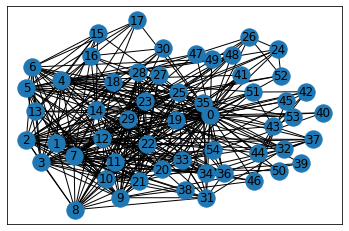

In [74]:
nx.draw_networkx(G)

In [70]:
nx.average_clustering(G)

0.6970785255496262

In [72]:
nx.shortest_path(G)

{0: {0: [0],
  1: [0, 1],
  2: [0, 2],
  3: [0, 3],
  4: [0, 4],
  5: [0, 5],
  6: [0, 6],
  7: [0, 7],
  8: [0, 8],
  9: [0, 9],
  10: [0, 10],
  11: [0, 11],
  12: [0, 12],
  13: [0, 13],
  14: [0, 14],
  15: [0, 15],
  16: [0, 16],
  17: [0, 17],
  18: [0, 18],
  19: [0, 19],
  20: [0, 20],
  21: [0, 21],
  22: [0, 22],
  23: [0, 23],
  24: [0, 24],
  25: [0, 25],
  26: [0, 26],
  27: [0, 27],
  28: [0, 28],
  29: [0, 29],
  30: [0, 30],
  31: [0, 31],
  32: [0, 32],
  33: [0, 33],
  34: [0, 34],
  35: [0, 35],
  36: [0, 36],
  37: [0, 37],
  38: [0, 38],
  39: [0, 39],
  40: [0, 40],
  41: [0, 41],
  42: [0, 42],
  43: [0, 43],
  44: [0, 44],
  45: [0, 45],
  46: [0, 46],
  47: [0, 47],
  48: [0, 48],
  49: [0, 49],
  50: [0, 50],
  51: [0, 51],
  52: [0, 52],
  53: [0, 53],
  54: [0, 54]},
 1: {1: [1],
  0: [1, 0],
  2: [1, 2],
  3: [1, 3],
  4: [1, 4],
  5: [1, 5],
  6: [1, 6],
  7: [1, 7],
  8: [1, 8],
  9: [1, 9],
  10: [1, 10],
  11: [1, 11],
  12: [1, 12],
  17: [1, 17],
  18

In [69]:
nx.degree_centrality(G)

{0: 1.037037037037037,
 1: 0.48148148148148145,
 2: 0.42592592592592593,
 3: 0.42592592592592593,
 4: 0.4074074074074074,
 5: 0.37037037037037035,
 6: 0.31481481481481477,
 7: 0.48148148148148145,
 8: 0.2962962962962963,
 9: 0.4074074074074074,
 10: 0.42592592592592593,
 11: 0.35185185185185186,
 12: 0.48148148148148145,
 13: 0.2222222222222222,
 14: 0.4629629629629629,
 15: 0.14814814814814814,
 16: 0.16666666666666666,
 17: 0.1111111111111111,
 18: 0.2777777777777778,
 19: 0.25925925925925924,
 20: 0.2962962962962963,
 21: 0.37037037037037035,
 22: 0.4629629629629629,
 23: 0.4444444444444444,
 24: 0.12962962962962962,
 25: 0.4444444444444444,
 26: 0.12962962962962962,
 27: 0.16666666666666666,
 28: 0.35185185185185186,
 29: 0.3333333333333333,
 30: 0.1111111111111111,
 31: 0.24074074074074073,
 32: 0.14814814814814814,
 33: 0.2037037037037037,
 34: 0.16666666666666666,
 35: 0.24074074074074073,
 36: 0.24074074074074073,
 37: 0.14814814814814814,
 38: 0.05555555555555555,
 39: 0.05555

Below is some code I thought I would try using from StackOverflow but it would've required a lot of extra work between Networkx and Numpy to convert the CSV into a workable clustered graph. I decided to keep the code in here for reference, further below is my Gephi outputs.

In [42]:
def make_label_dict(labels):
    l = {}
    for i, label in enumerate(labels):
        l[i] = label
    return l

In [43]:
def show_graph_with_labels(adjacency, mylabels):
    rows, cols = np.where(adjacency == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=54, labels=mylabels, with_labels=True)
    plt.scatter(adjacency)
    plt.show()
   

show_graph_with_labels(adjacency, make_label_dict(mydata.get_labels(r'C:\Users\Vainc\Downloads\london\LONDON_GANG.csv')))

# Gephi

Since it was listed as a matrix I imported it into Gephi as an undirected matrix. The results appear like so without much alterations:

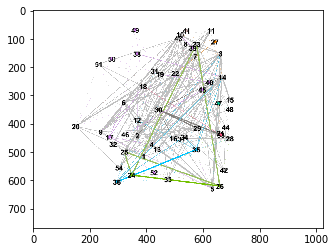

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread(r'C:\Users\Vainc\Desktop\london_gang.png')
plt.imshow(image)
plt.show() 
#This image is printed with the "Betweenness Centrality" selected with the Statistics of: Network Diameter and Modularity selected.

The newer image below is when I applied the "Betweenness Centrality" to the text size for each node. Trying to give myself a "no-brainer" in finding the node that interacts the least.

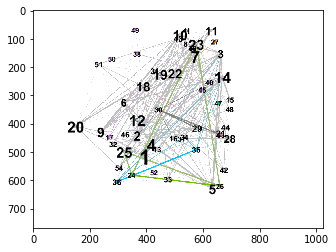

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread(r'C:\Users\Vainc\Desktop\london_gang_bcT.png')
plt.imshow(image)
plt.show() 

Just judging from this image I believe the culprit to delete or the "weakest link" would be a toss up between individuals number 50, 28, and 48. I will do separate deletions for some of them to figure out who it is.
You can also make an argument for 53, which is hidden under 21. The 53rd individual only has one link with individual 18 (likely because they're either kin or have committed a serious crime together). 

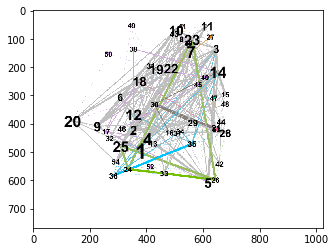

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread(r'C:\Users\Vainc\Desktop\london_gang_51delete.png')
plt.imshow(image)
plt.show() 

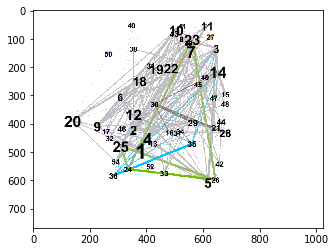

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread(r"C:\Users\Vainc\Desktop\london_gang_51&53delete.png")
plt.imshow(image)
plt.show() 

You can barely tell the difference between deleting 51 and deleting 53, since they both seemed to have minimalistic impact and very little edge connections compared to every other node.